# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
 # Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup
# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object

#safe html from browser
html = browser.html

# Create a Beautiful Soup Object from html
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data
table = soup.find("table", {"class":"table"})

dfs = pd.read_html(str(table))
df = dfs[0]

df.head()

C:\Users\Luisa\AppData\Local\Temp\ipykernel_11228\965726729.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
table_rows = table.find_all("tr", {"class": "data-row"})
for table_row in table_rows[0:10]:
    id = table_row.find_all("td")[0].text
    terrestrial_date = table_row.find_all("td")[1].text
    print(terrestrial_date)


2012-08-16
2012-08-17
2012-08-18
2012-08-19
2012-08-20
2012-08-21
2012-08-22
2012-08-23
2012-08-27
2012-08-28


 Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.
    Hint You can use the Pandas astype and to_datetime methods to accomplish this task.


In [12]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [13]:
# Change data types for data analysis
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])

In [14]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [15]:
 df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?
df.month.nunique()

12

In [18]:
# 2. How many sols (Martian days) worth of data are there?
df.sol.count() 

np.int64(1867)

In [19]:
# 3. What is the average minimum temperature by month?
df.groupby("month").min_temp.mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

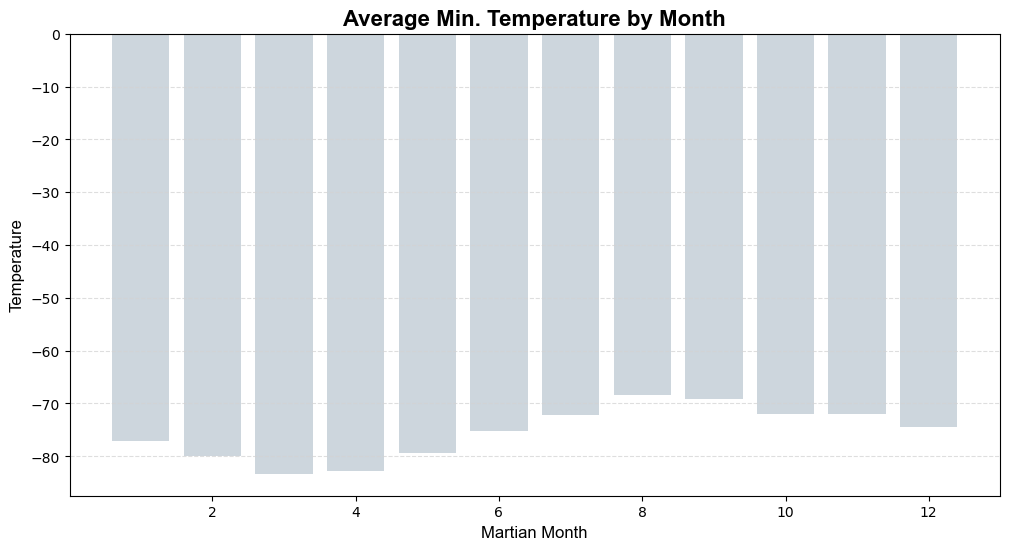

In [51]:
# Plot the average minimum temperature by month
data = df.groupby("month").min_temp.mean()

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(data.index, data.values, color="#CDD6DD", align="center")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Martian Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Average Min. Temperature by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

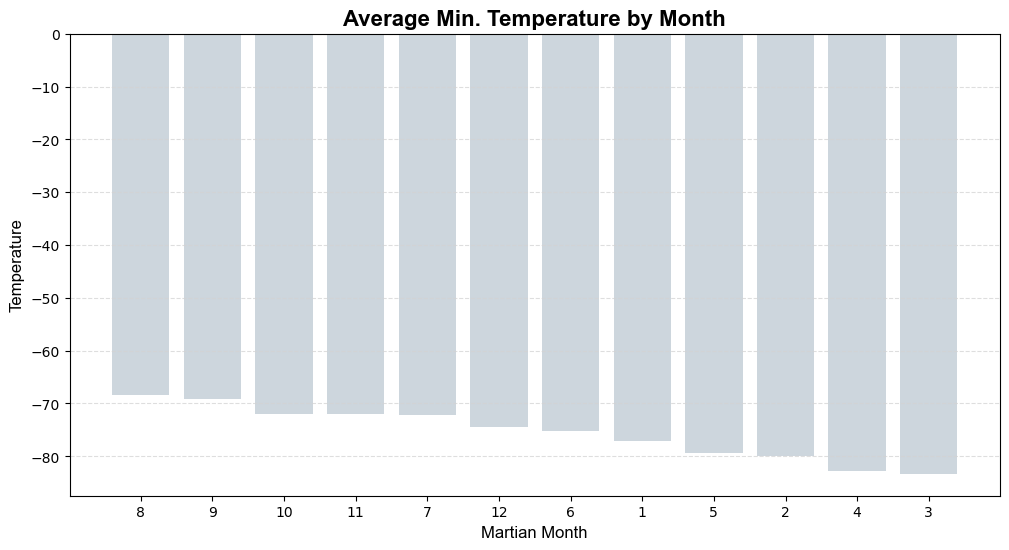

In [55]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Plot the average minimum temperature by month
# Data Viz Recipe
data = df.groupby("month").min_temp.mean().sort_values(ascending=False)

# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.bar(data.index.astype(str), data.values, color="#CDD6DD", align="center") # make the month a string

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Martian Month", fontfamily="Arial", fontsize=12)
plt.ylabel("Temperature", fontfamily="Arial", fontsize=12)
plt.title("Average Min. Temperature by Month", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

In [22]:
# 4. What is the average pressure by month?
df.groupby("pressure").min_temp.mean()

pressure
727.0   -77.0
728.0   -77.0
729.0   -76.5
730.0   -78.0
731.0   -77.5
         ... 
921.0   -67.0
922.0   -65.5
923.0   -67.2
924.0   -68.0
925.0   -69.0
Name: min_temp, Length: 199, dtype: float64

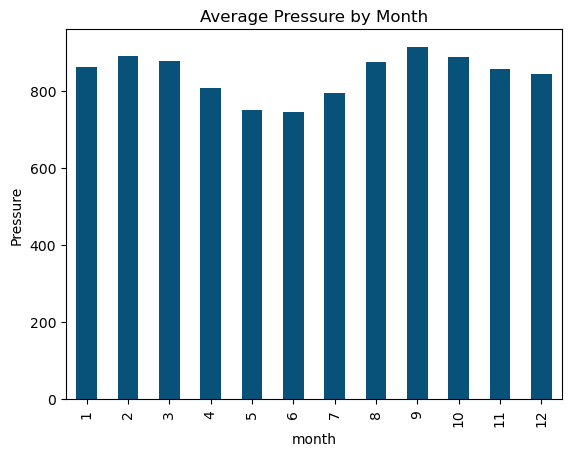

In [63]:
# Plot the average pressure by month
df.groupby("month").pressure.mean().plot(kind="bar", title="Average Pressure by Month", ylabel="Pressure", color="#08527A")
plt.show()

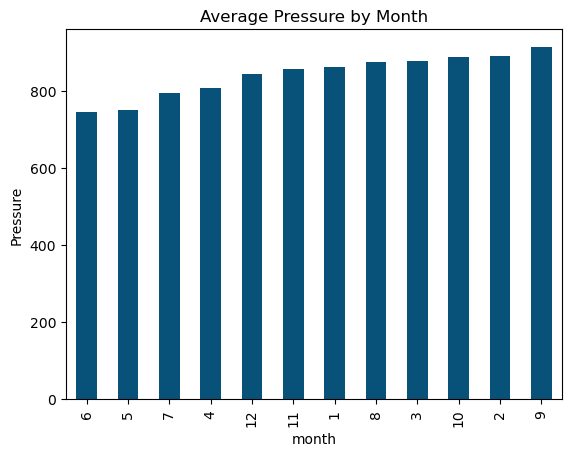

In [65]:
 # Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
df.groupby("month").pressure.mean().sort_values().plot(kind="bar", title="Average Pressure by Month", ylabel="Pressure", color="#08527A")
plt.show()

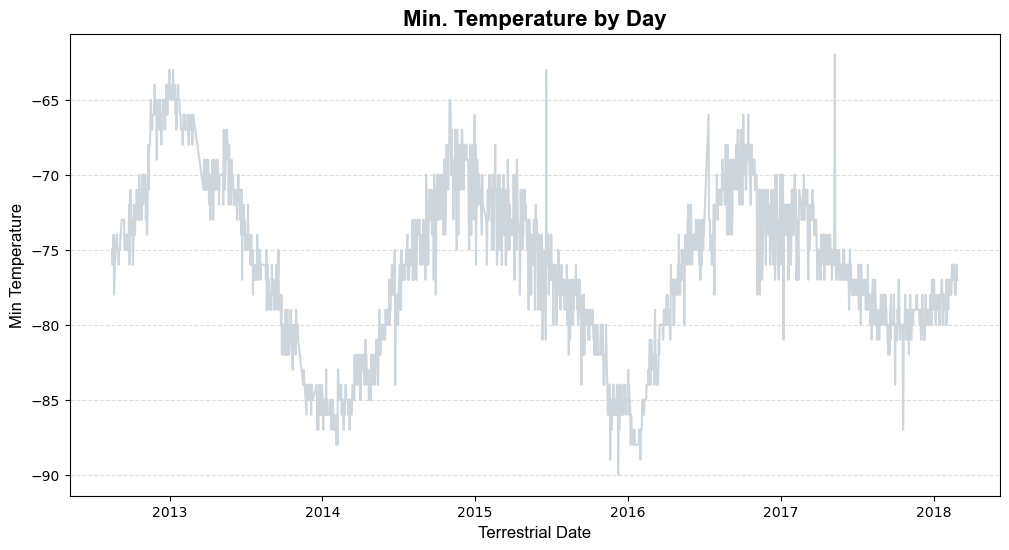

In [57]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df.terrestrial_date, df.min_temp, color="#CDD6DD")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Terrestrial Date", fontfamily="Arial", fontsize=12)
plt.ylabel("Min Temperature", fontfamily="Arial", fontsize=12)
plt.title("Min. Temperature by Day", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

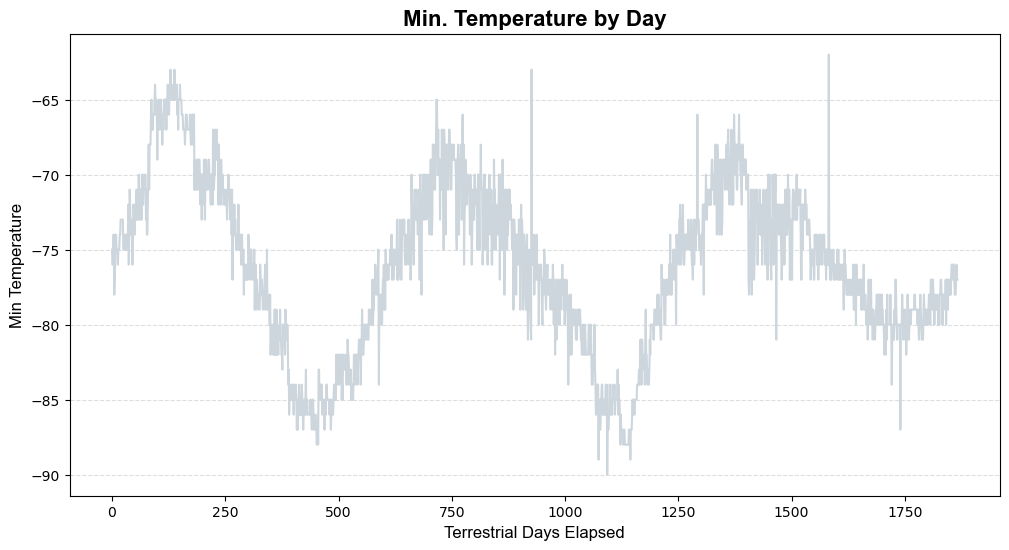

In [71]:
 # Change Canvas Size
plt.figure(figsize=(12, 6))

# Create a basic plot
plt.plot(df.index, df.min_temp, color="#CDD6DD")

# Customizations

# Change colors
# Add in reference lines
# Add Labels/Title
plt.xlabel("Terrestrial Days Elapsed", fontfamily="Arial", fontsize=12)
plt.ylabel("Min Temperature", fontfamily="Arial", fontsize=12)
plt.title("Min. Temperature by Day", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
# plt.ylim(0, 350)

# Add in a background grid
plt.grid(axis="y", linestyle="--", color="lightgrey", alpha=0.75)

# Show/Save the Graph
plt.show()

#### Minimum Temperature

I observe that the minumun tempeture happen in the month #5 and 6 anf the coldest in Month of 9  being over 800

#### Atmospheric Pressure

The lowest pressure was around 780 in month #6 and the highest presuare went up closer to 1000 in the month #9

#### Year Length

In Martian year I calculated to be around 600 days, I measured the peaks in summer, the first one is around 180 and second peak at 790 and tith peak 1,400

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [69]:
# Write the data to a CSV
 # Write the data to a CSV
df.to_csv("mars_boooooth_data.csv", index=False)

In [30]:
browser.quit()